# Definição do problema

- Base de dados:
  - Input (X): Temperatura
  - Output (Y): Lucro diário em dólares

# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

# Etapa 2: Importação da base de dados

In [2]:
# Leitura do arquivo csv
file = pd.read_csv('SalesData.csv')

In [3]:
# Visualização de todos os registros
file

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
# Visualização dos 5 primeiros registros
file.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
# Visualização dos 10 últimos registros
file.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
# Visualização de informações da base de dados
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
# Descrição da base de dados
file.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3: Visualização da base de dados

<Axes: xlabel='Temperature', ylabel='Revenue'>

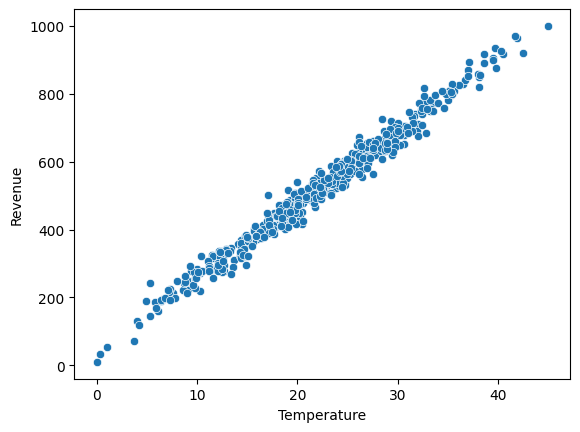

In [9]:
# Scatter plot do Seborn
sns.scatterplot(x=file.Temperature, y=file.Revenue)

# Etapa 4: Criação das variáveis da base de dados

In [53]:
# Criação das variáveis X_train e y_train
x_train = file.Temperature
y_train = file.Revenue

In [11]:
# Formato da variável X_train
x_train.shape

(500,)

In [12]:
# Formato da variável y_train
y_train.shape

(500,)

# Etapa 5: Criação e construção do modelo

In [33]:
# Construção do modelo sequencial
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_shape=[1]))
model.add(tf.keras.layers.Dense(units=1))


In [34]:
# Sumário do modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Compilar o modelo
model.compile(optimizer=tf.optimizers.Adam(0.1), loss='mean_squared_error')

In [36]:
# Treinamento
epochs_hist = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 1s 3ms/step - loss: 133993.2812
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 14784.6133
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 3885.3889
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 1309.8922
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 764.0385
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 702.0557
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 682.0680
Epoch 8/1000
16/16 [==============================] - 0s 3ms/step - loss: 682.5397
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 689.7355
Epoch 10/1000
16/16 [==============================] - 0s 3ms/step - loss: 682.6166
Epoch 11/1000
16/16 [==============================] - 0s 3ms/step - loss: 667.7042
Epoch 12/1000
16/16 [==============================] - 0s 3ms/step - loss: 666

# Etapa 6: Avaliação do modelo

In [37]:
# Visualização do dicionário com os resultados
epochs_hist.history.keys()

dict_keys(['loss'])

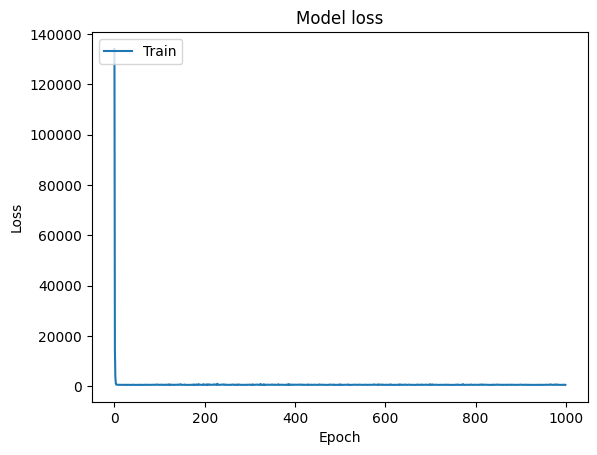

In [38]:
# Gráfico com os resultados da loss function
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [39]:
# Visualização dos pesos
model.get_weights()

[array([[ 1.0025000e-02,  1.2604120e-02, -4.0969145e-03, -1.8155156e+00,
         -4.2016478e+00, -1.4235665e-02,  4.8957756e-03, -8.0402527e-04,
          2.5290927e-02, -7.0722185e-02]], dtype=float32),
 array([ 0.50460047, -0.43758667, -0.15050073, -3.9740543 , -6.057436  ,
        -0.39402658, -0.13738948,  0.02310228, -1.1124448 ,  1.9327023 ],
       dtype=float32),
 array([[-2.8655387e-02],
        [ 1.6465184e-03],
        [ 9.4964709e-03],
        [-1.9297134e+00],
        [-4.2480617e+00],
        [ 2.8156199e-02],
        [-8.7918591e-04],
        [ 1.1060645e-04],
        [ 1.1451205e-02],
        [ 1.4498056e-02]], dtype=float32),
 array([11.213409], dtype=float32)]

In [40]:
# Previsões com o modelo treinado, com a temperatura de 5 graus
temp = 5
model.predict([temp])

1/1 [==============================] - 0s 59ms/step


array([[151.35645]], dtype=float32)

16/16 [==============================] - 0s 1ms/step


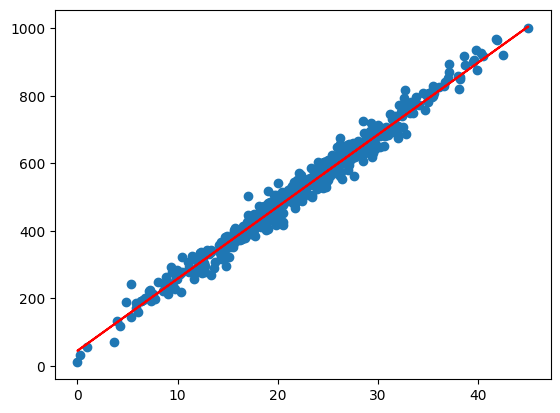

In [41]:
# Gráfico com a reta da regressão linear
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color='red')
plt.show()

# Etapa 7: Confirmar os resultados usando sklearn

In [54]:
# Usar o sklearn para obter os mesmos resultados
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [48]:
regressor.coef_

array([[21.44362551]])

In [49]:
regressor.intercept_

array([44.83126709])

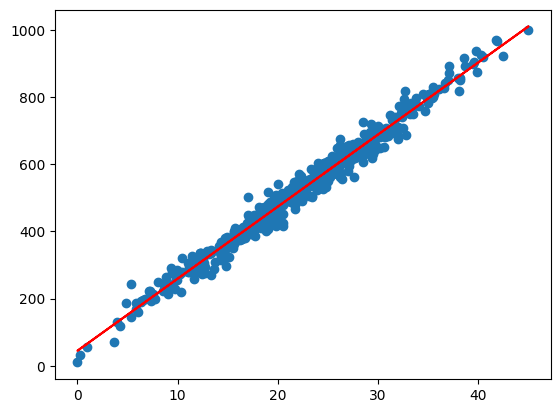

In [50]:
# Gráfico com a reta da regressão linear
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.show()

In [52]:
# Previsões com o modelo treinado, com a temperatura de 5 graus
temp = 5
regressor.predict([[temp]])

array([[152.04939464]])